<a href="https://www.kaggle.com/code/indrajithsudusinghe/automobile-sales-dataset-for-interactive-dashboard?scriptVersionId=291210991" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚗 Automobile Sales Dashboard (Dash & Plotly)

This project analyzes automobile sales data across recession and non-recession periods. An interactive dashboard was built using **Dash and Plotly** to visualize sales trends, advertising expenditure, and vehicle type performance.

⚠️ Note: Dash apps cannot be deployed directly on Kaggle.The full Dash application is available on GitHub and runs locally.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/automobile-sales-dataset-for-dashboard-analysis/automobile_sales.csv")
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York


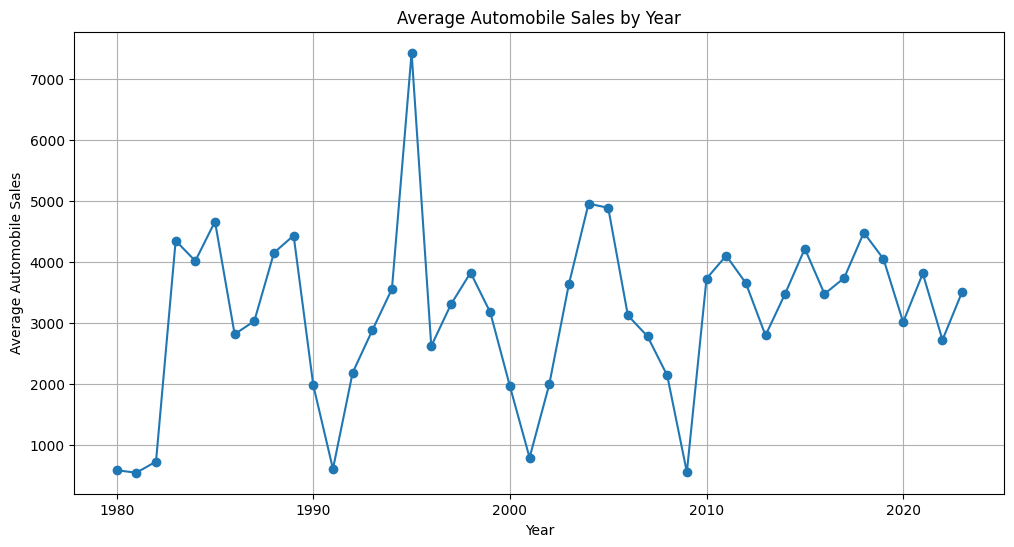

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Year and calculate average sales
avg_sales_year = df.groupby('Year')['Automobile_Sales'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_sales_year.index, avg_sales_year.values, marker='o')
plt.title('Average Automobile Sales by Year')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.grid(True)
plt.show()


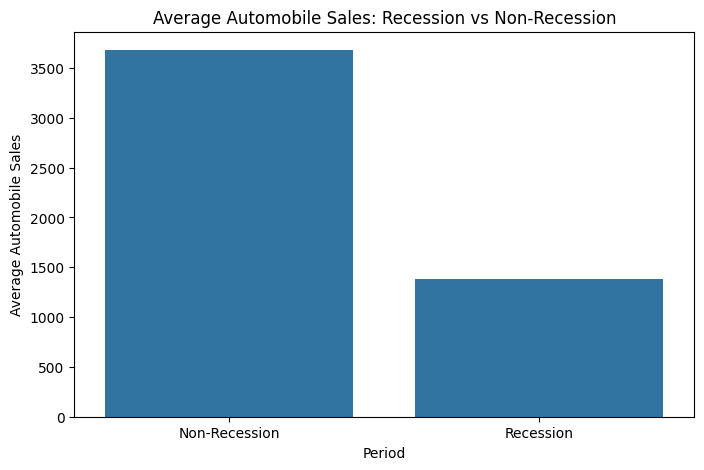

In [4]:
# Map recession values for readability
df['Recession_Label'] = df['Recession'].map({0: 'Non-Recession', 1: 'Recession'})

avg_sales_recession = df.groupby('Recession_Label')['Automobile_Sales'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=avg_sales_recession.index,
    y=avg_sales_recession.values
)
plt.title('Average Automobile Sales: Recession vs Non-Recession')
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.show()


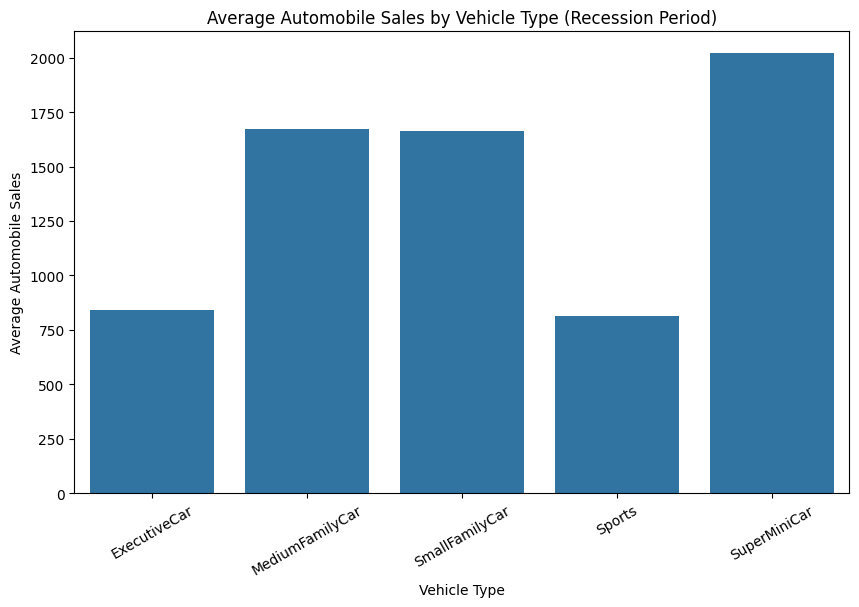

In [5]:
recession_data = df[df['Recession'] == 1]

vehicle_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Vehicle_Type',
    y='Automobile_Sales',
    data=vehicle_sales
)
plt.title('Average Automobile Sales by Vehicle Type (Recession Period)')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.xticks(rotation=30)
plt.show()


## 📊 Dashboard Screenshots

## Yearly Statistics Dashboard
<img src= "/kaggle/input/dashboard/Yearly Statistics dashboard.png" alt="Yearly Statistics Dashboard" width="600">

## Recession Period Dashboard
<img src= "/kaggle/input/dashboard/Recession Period Statistics dashboard.png" alt="Recession Period Dashboard" width="600">



```python
# ===============================
# Automobile Sales Dashboard
# Dash + Plotly (FULL FIXED CODE)
# ===============================

import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# -------------------------------
# Load Dataset
# -------------------------------
data = pd.read_csv(
    "/kaggle/input/automobile-sales-dataset-for-dashboard-analysis/automobile_sales.csv"
)

# -------------------------------
# Initialize Dash App
# -------------------------------
app = dash.Dash(__name__)
app.title = "Automobile Statistics Dashboard"

# -------------------------------
# Dropdown Options
# -------------------------------
dropdown_options = [
    {"label": "Yearly Statistics", "value": "Yearly Statistics"},
    {"label": "Recession Period Statistics", "value": "Recession Period Statistics"}
]

year_list = list(range(1980, 2024))

# -------------------------------
# App Layout
# -------------------------------
app.layout = html.Div([

    html.H1(
        "Automobile Sales Statistics Dashboard",
        style={"textAlign": "center", "color": "#503D36"}
    ),

    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id="statistics-dropdown",
            options=dropdown_options,
            value="Yearly Statistics",
            placeholder="Select a report type"
        )
    ]),

    html.Br(),

    html.Div([
        dcc.Dropdown(
            id="select-year",
            options=[{"label": i, "value": i} for i in year_list],
            value=2020
        )
    ]),

    html.Div(
        id="output-container",
        style={"marginTop": "30px"}
    )
])

# --------------------------------------------------
# Disable Year Dropdown During Recession Statistics
# --------------------------------------------------
@app.callback(
    Output("select-year", "disabled"),
    Input("statistics-dropdown", "value")
)
def disable_year_dropdown(selected_statistics):
    if selected_statistics == "Recession Period Statistics":
        return True
    return False

# -------------------------------
# Callback for Charts
# -------------------------------
@app.callback(
    Output("output-container", "children"),
    [
        Input("statistics-dropdown", "value"),
        Input("select-year", "value")
    ]
)
def update_output_container(selected_statistics, input_year):

    # =============================
    # RECESSION PERIOD STATISTICS
    # =============================
    if selected_statistics == "Recession Period Statistics":

        recession_data = data[data["Recession"] == 1]

        # Chart 1: Average Sales by Year
        yearly_rec = recession_data.groupby("Year")["Automobile_Sales"].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(
                yearly_rec,
                x="Year",
                y="Automobile_Sales",
                title="Average Automobile Sales during Recession"
            )
        )

        # Chart 2: Average Sales by Vehicle Type
        avg_sales = recession_data.groupby("Vehicle_Type")["Automobile_Sales"].mean().reset_index()
        R_chart2 = dcc.Graph(
            figure=px.bar(
                avg_sales,
                x="Vehicle_Type",
                y="Automobile_Sales",
                title="Average Sales by Vehicle Type (Recession)"
            )
        )

        # Chart 3: Advertisement Expenditure Share
        exp_rec = recession_data.groupby("Vehicle_Type")["Advertising_Expenditure"].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(
                exp_rec,
                names="Vehicle_Type",
                values="Advertising_Expenditure",
                title="Advertisement Expenditure Share during Recession"
            )
        )

        # Chart 4: Unemployment Rate vs Sales
        unemp_data = recession_data.groupby(
            ["unemployment_rate", "Vehicle_Type"]
        )["Automobile_Sales"].mean().reset_index()

        R_chart4 = dcc.Graph(
            figure=px.bar(
                unemp_data,
                x="unemployment_rate",
                y="Automobile_Sales",
                color="Vehicle_Type",
                title="Effect of Unemployment Rate on Sales"
            )
        )

        return [
            html.Div([
                html.Div(R_chart1, style={"width": "50%"}),
                html.Div(R_chart2, style={"width": "50%"})
            ], style={"display": "flex"}),

            html.Div([
                html.Div(R_chart3, style={"width": "50%"}),
                html.Div(R_chart4, style={"width": "50%"})
            ], style={"display": "flex"})
        ]

    # =============================
    # YEARLY STATISTICS
    # =============================
    elif selected_statistics == "Yearly Statistics" and input_year:

        yearly_data = data[data["Year"] == input_year]

        # Chart 1: Average Sales by Year
        yas = data.groupby("Year")["Automobile_Sales"].mean().reset_index()
        Y_chart1 = dcc.Graph(
            figure=px.line(
                yas,
                x="Year",
                y="Automobile_Sales",
                title="Average Automobile Sales by Year"
            )
        )

        # Chart 2: Monthly Sales
        mas = yearly_data.groupby("Month")["Automobile_Sales"].sum().reset_index()
        Y_chart2 = dcc.Graph(
            figure=px.line(
                mas,
                x="Month",
                y="Automobile_Sales",
                title="Total Monthly Automobile Sales"
            )
        )

        # Chart 3: Vehicle Type Sales
        avr_vdata = yearly_data.groupby("Vehicle_Type")["Automobile_Sales"].mean().reset_index()
        Y_chart3 = dcc.Graph(
            figure=px.bar(
                avr_vdata,
                x="Vehicle_Type",
                y="Automobile_Sales",
                title=f"Average Vehicle Sales by Type in {input_year}"
            )
        )

        # Chart 4: Advertisement Expenditure
        exp_data = yearly_data.groupby("Vehicle_Type")["Advertising_Expenditure"].sum().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(
                exp_data,
                names="Vehicle_Type",
                values="Advertising_Expenditure",
                title="Total Advertisement Expenditure by Vehicle Type"
            )
        )

        return [
            html.Div([
                html.Div(Y_chart1, style={"width": "50%"}),
                html.Div(Y_chart2, style={"width": "50%"})
            ], style={"display": "flex"}),

            html.Div([
                html.Div(Y_chart3, style={"width": "50%"}),
                html.Div(Y_chart4, style={"width": "50%"})
            ], style={"display": "flex"})
        ]

    else:
        return None

# -------------------------------
# Run App
# -------------------------------
if __name__ == "__main__":
    app.run_server(debug=True)

```

In [6]:
print('finished')

finished
